Trabalhando com Planilhas do Excel

In [3]:
#Importando a biblioteca
import pandas as pd

In [4]:
#Leitura dos arquivos
df1 = pd.read_excel("/content/drive/MyDrive/BOOTCAMP UNIMED BH - PYTHON /datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/BOOTCAMP UNIMED BH - PYTHON /datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/BOOTCAMP UNIMED BH - PYTHON /datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/BOOTCAMP UNIMED BH - PYTHON /datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/BOOTCAMP UNIMED BH - PYTHON /datasets/Salvador.xlsx")

In [5]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [6]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [7]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [8]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
223,Salvador,2019-01-02,40.51,1037,2
233,Natal,2019-01-03,172.40,1036,2
79,Fortaleza,2019-01-01,41.25,1005,6
55,Salvador,2019-01-01,36.62,1036,1
45,Fortaleza,2019-01-01,39.63,1004,3


In [10]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
199,Natal,2019-01-02,153.87,1036,3
177,Natal,2019-01-02,41.19,1037,2
61,Salvador,2019-01-01,4.54,1036,3
19,Recife,2019-01-01,199.43,983,7
17,Natal,2018-02-18,276.00,854,3


In [11]:
#Verificando o tipo de dados de cada coluna

In [11]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [14]:
#Alterando o tipo de dados da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

**Tratando valores faltantes**

In [13]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [15]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [16]:
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0,inplace=True)

In [17]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [18]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"],inplace=True)

In [19]:
#Removendo linhas que estejam com valores faltantes em todas as colunas]
df.dropna(how="all",inplace=True)

**Criando novas colunas**

In [20]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [21]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [22]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [24]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [25]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [26]:
#nlargest - O top 3 com as maiores receitas
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [27]:
#nsmallest - O top 3 com as piores receitas
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [28]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [30]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


**Trabalhando com datas**


In [34]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [35]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [36]:
#Transformando a coluna Data em data
df["Data"] = pd.to_datetime(df["Data"])
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                     int64
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [37]:
#Agrupamento por Ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
84,Natal,2019-01-02,22.99,1036,1,22.99,1.0
41,Recife,2019-02-13,157.78,981,4,631.12,4.0
166,Salvador,2019-01-02,111.72,1035,3,335.16,3.0
151,Salvador,2019-01-02,14.63,1035,1,14.63,1.0
105,Recife,2019-01-01,41.12,980,3,123.36,3.0


In [69]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [70]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,mes_venda,dia_venda,diferenca_dias,trimestre_venda,Ano_Venda
47,Fortaleza,2019-01-01,13.45,1004,5,67.25,5.0,1,1,365 days,1,2019
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,3,2,425 days,1,2019
67,Aracaju,2018-01-01,78.13,1521,4,312.52,4.0,1,1,0 days,1,2018
113,Natal,2019-01-02,18.90,1034,3,56.70,3.0,1,2,366 days,1,2019
13,Natal,2018-09-12,458.00,852,4,1832.00,4.0,9,12,254 days,3,2018


In [39]:
#Extraindo o mês e o dia
df["mes_venda"],df["dia_venda"]= (df["Data"].dt.month,df["Data"].dt.day)

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,mes_venda,dia_venda
201,Natal,2019-01-02,86.61,1036,1,86.61,1.0,1,2
28,Natal,2019-02-13,705.00,853,2,1410.00,2.0,2,13
2,Natal,2019-03-11,308.00,852,3,924.00,3.0,3,11
25,Salvador,2019-01-01,220.62,1035,1,220.62,1.0,1,1
110,Salvador,2019-03-02,185.93,1036,3,557.79,3.0,3,2


In [41]:
#Retornando a data mais antigo
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [43]:
#Calculando a diferença de dias 
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [44]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,mes_venda,dia_venda,diferenca_dias
46,Fortaleza,2019-01-01,6.45,1003,3,19.35,3.0,1,1,365 days
98,Salvador,2019-01-01,231.76,1036,3,695.28,3.0,1,1,365 days
141,Salvador,2019-03-02,9.08,1036,1,9.08,1.0,3,2,425 days
224,Salvador,2019-01-02,178.30,1035,3,534.90,3.0,1,2,366 days
30,Salvador,2019-01-01,47.96,1034,2,95.92,2.0,1,1,365 days


In [71]:
#Criando a coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [72]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,mes_venda,dia_venda,diferenca_dias,trimestre_venda,Ano_Venda
80,Salvador,2019-01-01,40.24,1036,2,80.48,2.0,1,1,365 days,1,2019
164,Natal,2019-01-02,6.59,1035,1,6.59,1.0,1,2,366 days,1,2019
88,Aracaju,2018-01-01,190.67,1521,5,953.35,5.0,1,1,0 days,1,2018
80,Recife,2019-01-01,114.14,982,8,913.12,8.0,1,1,365 days,1,2019
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,1,3,367 days,1,2019


In [48]:
#Filtrando as vendas de 2019 do mês de março
#loc é para localizar algo no data frame (df)
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month ==3)]
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,3,2,425 days,1


In [49]:
df.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,mes_venda,dia_venda,diferenca_dias,trimestre_venda
204,Natal,2019-01-02,151.41,1037,2,302.82,2.0,1,2,366 days,1
54,Salvador,2019-01-01,46.54,1037,3,139.62,3.0,1,1,365 days,1
112,Natal,2019-01-02,43.00,1036,3,129.00,3.0,1,2,366 days,1
82,Aracaju,2018-01-01,150.48,1522,4,601.92,4.0,1,1,0 days,1
71,Fortaleza,2019-01-01,41.89,1004,4,167.56,4.0,1,1,365 days,1
51,Fortaleza,2019-01-01,30.47,1005,3,91.41,3.0,1,1,365 days,1
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,1,1,0 days,1
136,Natal,2019-01-02,13.81,1036,1,13.81,1.0,1,2,366 days,1
89,Recife,2019-01-01,18.11,980,3,54.33,3.0,1,1,365 days,1
111,Salvador,2019-03-02,147.35,1037,2,294.70,2.0,3,2,425 days,1


**Visualização de Dados**

In [50]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

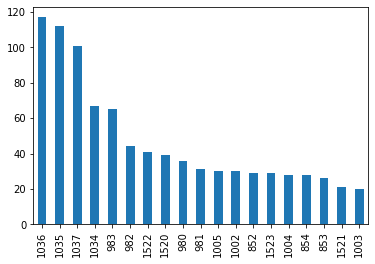

In [51]:
#Gráfico de Barras
df["LojaID"].value_counts(ascending=False).plot.bar()

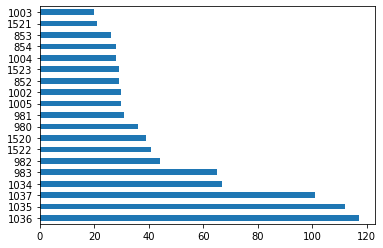

In [52]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

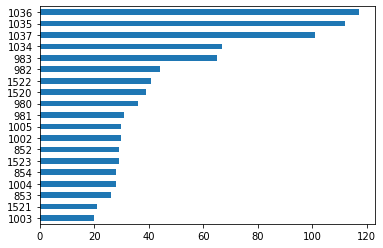

In [53]:
#Gráfico de barras
#Ponto e vírgula no final do comando é para não exibir o texto acima do gráfico
df["LojaID"].value_counts(ascending=True).plot.barh();

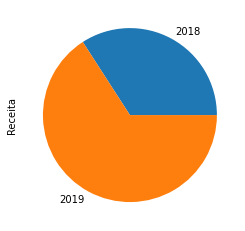

In [54]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [55]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

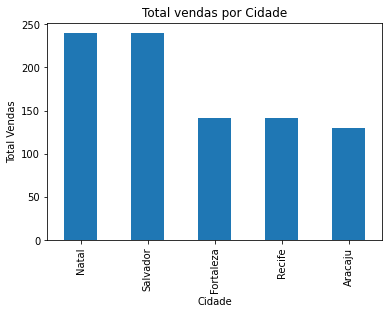

In [58]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

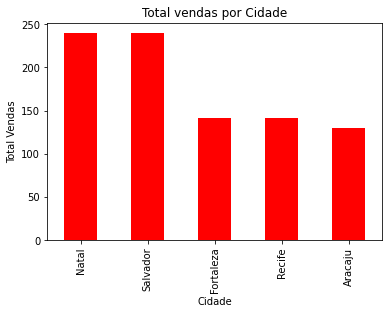

In [59]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [60]:
#Alterando o estilo
plt.style.use("ggplot")

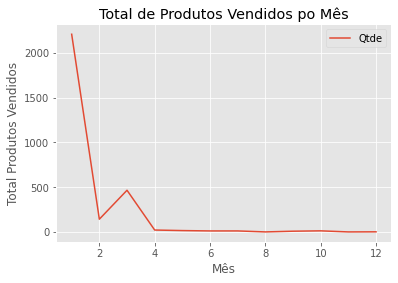

In [63]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos po Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [64]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [73]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

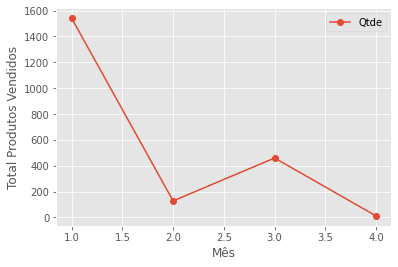

In [74]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

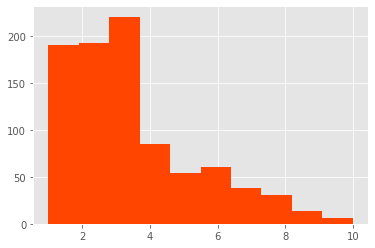

In [75]:
#Gráfico de Histograma
plt.hist(df["Qtde"], color = "orangered");

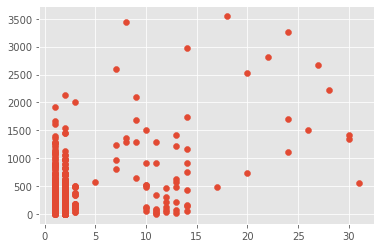

In [76]:
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

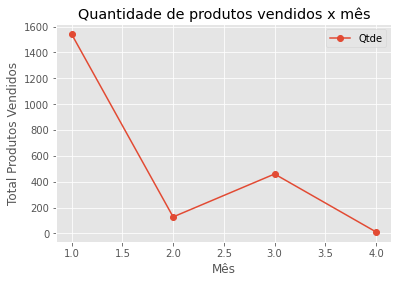

In [77]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x Mes.png")